# Sea Level Data Scrup and Linear Regression

In [1]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [2]:
sea_data = pd.read_csv('data/GMSL_merged_nasa_1993_2020.csv')
# sea_data 
sea_data.head(5)

# sea_level = sea_data['GMSL'].values
# sea_level

,year_fraction,gmsl
0,1993.011526,92.66
1,1993.038692,95.39
2,1993.065858,92.29
3,1993.093025,96.20
4,1993.120191,94.64


In [3]:
#Importing Dependancies for datetime
from datetime import timedelta, datetime

#conversion formula for Converting year fractions aka year decimals into datetimes
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*365.25)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date



In [4]:
#Get Results
sea_data['date'] = sea_data['year_fraction'].apply(convert_partial_year)
#sea_data

#Drop the unused column
sea_data_1 = sea_data.drop(['year_fraction'], axis=1)
sea_data_1 

,gmsl,date
0,92.66,1993-01-05 05:02:12.897607
1,95.39,1993-01-15 03:10:26.659203
2,92.29,1993-01-25 01:18:40.420798
3,96.20,1993-02-03 23:27:25.739997
4,94.64,1993-02-13 21:35:39.501599
...,...,...
991,105.40,2019-12-11 18:19:25.773595
992,101.96,2019-12-21 16:27:39.535198
993,100.10,2019-12-31 14:35:53.296800
994,98.39,2020-01-10 06:07:49.583997


In [5]:
#Get the Year
sea_data_1['year'] = sea_data_1['date'].apply(lambda x: x.year)
#sea_data_1

#Drop unused date
sea_data_2 = sea_data_1.drop(['date'], axis=1)
sea_data_2

# Re-order Columns
sea_data_2 = sea_data_2[['year', 'gmsl']]
sea_data_2.tail(5) 

,year,gmsl
991,2019,105.40
992,2019,101.96
993,2019,100.10
994,2020,98.39
995,2020,97.91


In [6]:
#Rename Columns 
sea_data_2.columns = ['Year', 'GMSL']
sea_data_2

#Dropping off outliers index row 9 for 1993 , 2018 945-953 and for 2019 remove 980-993
# sea_data_drop = sea_data_2.drop(sea_data_2.index[9])
# sea_data_drop

# #Drop the 2018 945-953
# sea_data_3 = sea_data_drop.drop(sea_data_drop.index[944:953])
# sea_data_3.head(5)

,Year,GMSL
0,1993,92.66
1,1993,95.39
2,1993,92.29
3,1993,96.20
4,1993,94.64
...,...,...
991,2019,105.40
992,2019,101.96
993,2019,100.10
994,2020,98.39


### To Do: Group by Year and use Average gmsl 


In [7]:
#Group by and reset index 
# Drop everything after 2015 
#Find average gmsl after grouping 

sea_data_3 = sea_data_2.groupby('Year')['GMSL'].mean()
sea_data_3.reset_index()

#Drop everything after 2015
sea_data_4 = sea_data_3.drop(sea_data_3.index[23:28])


In [8]:
#Reset Index 
sea_data_4.reset_index()

,Year,GMSL
0,1993,90.471622
1,1994,89.516216
2,1995,87.334722
3,1996,85.473243
4,1997,99.442432
5,1998,96.977297
6,1999,87.769459
7,2000,86.657297
8,2001,84.688378
9,2002,85.895278


In [9]:
sea_data_4

Year
1993     90.471622
1994     89.516216
1995     87.334722
1996     85.473243
1997     99.442432
1998     96.977297
1999     87.769459
2000     86.657297
2001     84.688378
2002     85.895278
2003     87.178919
2004     86.263784
2005     85.427838
2006     86.161389
2007     85.265946
2008     86.838889
2009     85.634054
2010     87.830811
2011     89.016757
2012     87.514324
2013     87.777297
2014     88.426667
2015    100.599189
Name: GMSL, dtype: float64

In [10]:
#Import dependancies 
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [11]:
#Data 
data = sea_data_4.reset_index() # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


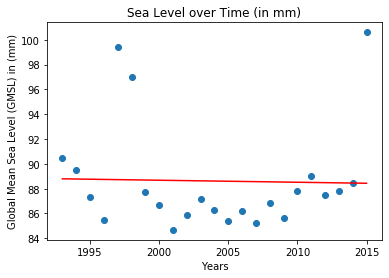

In [12]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Global Mean Sea Level (GMSL) in (mm)')
plt.title('Sea Level over Time (in mm)')
plt.show()

The sea level from 1993 - 2015 has some outliers and I decided to keep the outliers pending furthe research.  

The GMSL is a 1-dimensional time series of globally averaged Sea Surface Height Anomalies (SSHA) from TOPEX/Poseidon, Jason-1, OSTM/Jason-2 and Jason-3. It starts in September 1992 to present, with a lag of up to 4 months. All biases and cross-calibrations have been applied to the data so SSHA are consistent between satellites. Data are reported as changes relative to January 1, 1993 and are 2-month averages. Glacial Isostatic Adjustment (GIA) has been applied. These data are available in ASCII format. Reference: Beckley et al., 2017,

This is the “uncertainty margin,” or the range from the mean (average) within which there is a high probability that the true number resides. For example, when we say that global mean sea level for a particular month is 50mm +/- 4 mm, the true value for that month has a high probability of being between 46 and 54 mm. The uncertainty margin exists both because of sea level variability (sea level above the first point in the time series) in the ocean and the accuracy with which we measure the individual values. https://sealevel.nasa.gov/understanding-sea-level/key-indicators/global-mean-sea-level/  Source: https://podaac-tools.jpl.nasa.gov/drive/files/allData/merged_alt/L2/TP_J1_OSTM/global_mean_sea_level/GMSL_TPJAOS_4.2_199209_202001.txt

- Melissa Wright

In [13]:
sea_data_4.to_csv("data/sealevel_data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
